In [2]:
import pyzed.sl as sl

# Create a ZED camera object
zed = sl.Camera()

# Set configuration parameters
init_params = sl.InitParameters()
init_params.depth_mode = sl.DEPTH_MODE.ULTRA # Use ULTRA depth mode
init_params.coordinate_units = sl.UNIT.MILLIMETER # Use millimeter units (for depth measurements)

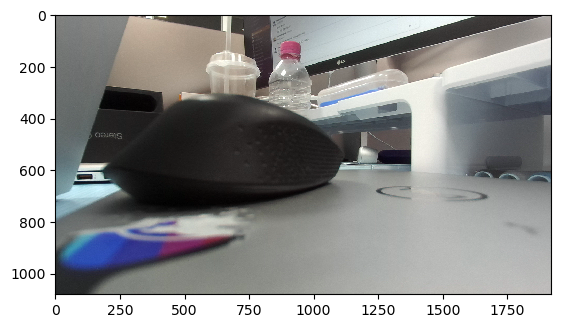

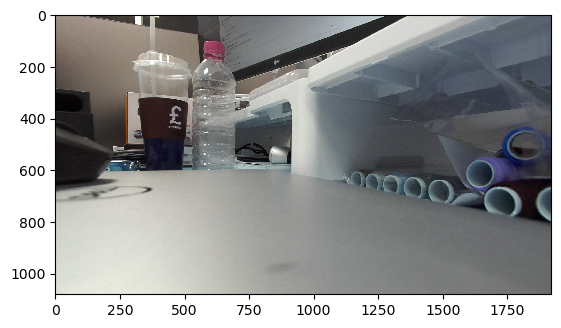

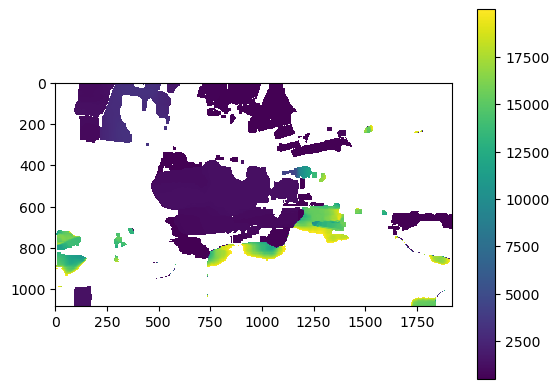

In [22]:
import pyzed.sl as sl
import cv2
import matplotlib.pyplot as plt

# Create a ZED camera object
zed = sl.Camera()

# Set configuration parameters
init_params = sl.InitParameters()
init_params.camera_resolution = sl.RESOLUTION.HD1080
init_params.camera_fps = 30

# Open the camera
err = zed.open(init_params)
if err != sl.ERROR_CODE.SUCCESS:
    print("Error opening ZED camera: ", sl.ERROR_CODE.to_string(err))
    exit()

# Capture images
image_l = sl.Mat()
image_r = sl.Mat()
depth_map = sl.Mat()
point_cloud = sl.Mat()
runtime_parameters = sl.RuntimeParameters()

# Grab a new frame
if zed.grab(runtime_parameters) == sl.ERROR_CODE.SUCCESS:
    # Retrieve the left and right images
    zed.retrieve_image(image_l, sl.VIEW.LEFT)
    zed.retrieve_image(image_r, sl.VIEW.RIGHT)
    zed.retrieve_measure(depth_map, sl.MEASURE.DEPTH)
    zed.retrieve_measure(point_cloud, sl.MEASURE.XYZRGBA)

    # Convert the images to OpenCV format
    image_l_ocv = image_l.get_data()
    depth_map_ocv = depth_map.get_data()
    image_r_ocv = image_r.get_data()
    pcd = point_cloud.get_data()
    
    # Display the left and right images
    plt.imshow(image_l_ocv)
    plt.show()

    plt.imshow(image_r_ocv)
    plt.show()

    plt.imshow(depth_map_ocv)
    plt.colorbar()
    plt.show()

# Close the camera and windows
zed.close()


In [20]:
depth_value = depth_map.get_value(300,50)
depth_value

(SUCCESS, 2165.664306640625)

In [10]:
# Set sensing mode in FILL
runtime_parameters =sl.RuntimeParameters()
runtime_parameters.sensing_mode = sl.SENSING_MODE.FILL

AttributeError: module 'pyzed.sl' has no attribute 'SENSING_MODE'

In [ ]:
init_params = sl.InitParameters()
init_params.coordinate_units = sl.UNIT.METER
init_params.depth_minimum_distance = 0.15 # Set the minimum depth perception distance to 15cm

In [28]:
# Get the 3D point cloud values for pixel (i,j)
point3D = point_cloud.get_value(300,50)
x = point3D[1][0]
y = point3D[1][1]
z = point3D[1][2]
color = point3D[1][3]

In [27]:
point3D[1]

array([-1886.54785156, -1510.21923828,  3071.99487305,            nan])

In [ ]:
# Measure the distance of a point in the scene represented by pixel (i,j)
point3D = point_cloud.get_value(i,j)
distance = math.sqrt(point3D[0]*point3D[0] + point3D[1]*point3D[1] + point3D[2]*point3D[2])

In [ ]:
point_cloud = sl.Mat()
# Retrieve a resized point cloud
# width and height specify the total number of columns and rows for the point cloud dataset
width = zed.get_resolution().width / 2
height = zed.get_resolution().height / 2
zed.retrieve_measure(point_cloud, sl.MEASURE.XYZRGBA, sl.MEM.GPU, width, height)

In [30]:
import pyzed.sl as sl
import math
import numpy as np
import sys

def main():
    # Create a Camera object
    zed = sl.Camera()

    # Create a InitParameters object and set configuration parameters
    init_params = sl.InitParameters()
    init_params.depth_mode = sl.DEPTH_MODE.PERFORMANCE  # Use PERFORMANCE depth mode
    init_params.coordinate_units = sl.UNIT.METER  # Use meter units (for depth measurements)
    init_params.camera_resolution = sl.RESOLUTION.HD720

    # Open the camera
    err = zed.open(init_params)
    if err != sl.ERROR_CODE.SUCCESS:
        exit(1)

    # Create and set RuntimeParameters after opening the camera
    runtime_parameters = sl.RuntimeParameters()
    runtime_parameters.confidence_threshold = 100
    runtime_parameters.texture_confidence_threshold = 100

    # Capture 150 images and depth, then stop
    i = 0
    image = sl.Mat()
    depth = sl.Mat()
    point_cloud = sl.Mat()

    mirror_ref = sl.Transform()
    mirror_ref.set_translation(sl.Translation(2.75,4.0,0))
    tr_np = mirror_ref.m

    while i < 150:
        # A new image is available if grab() returns SUCCESS
        if zed.grab(runtime_parameters) == sl.ERROR_CODE.SUCCESS:
            # Retrieve left image
            zed.retrieve_image(image, sl.VIEW.LEFT)
            # Retrieve depth map. Depth is aligned on the left image
            zed.retrieve_measure(depth, sl.MEASURE.DEPTH)
            # Retrieve colored point cloud. Point cloud is aligned on the left image.
            zed.retrieve_measure(point_cloud, sl.MEASURE.XYZRGBA)

            # Get and print distance value in mm at the center of the image
            # We measure the distance camera - object using Euclidean distance
            x = round(image.get_width() / 2)
            y = round(image.get_height() / 2)
            err, point_cloud_value = point_cloud.get_value(x, y)

            distance = math.sqrt(point_cloud_value[0] * point_cloud_value[0] +
                                 point_cloud_value[1] * point_cloud_value[1] +
                                 point_cloud_value[2] * point_cloud_value[2])

            point_cloud_np = point_cloud.get_data()
            point_cloud_np.dot(tr_np)

            if not np.isnan(distance) and not np.isinf(distance):
                print("Distance to Camera at ({}, {}) (image center): {:1.3} m".format(x, y, distance), end="\r")
                # Increment the loop
                i = i + 1
            else:
                print("Can't estimate distance at this position.")
                print("Your camera is probably too close to the scene, please move it backwards.\n")
            sys.stdout.flush()

    # Close the camera
    zed.close()

if __name__ == "__main__":
    main()

Can't estimate distance at this position.enter): 1.13 m
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.enter): 1.13 mm
Your camera is probably too close to the scene, please move it backwards.



/tmp/ipykernel_20515/2245947181.py:57: RuntimeWarning: invalid value encountered in cast
  point_cloud_np.dot(tr_np)


Can't estimate distance at this position.
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.enter): 1.04 m
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.enter): 1.13 m
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.enter): 1.03 m
Your camera is probably too close to the scene, please move it backwards.

Can't estimate distance at this position.enter): 1.06 m
Your camera is probably too close to the scene, please move it backwards.

Can't es

KeyboardInterrupt: 